**Part (a)**

In [63]:
import pandas as pd

# Load the training and test data
training_data = pd.read_csv('/Users/tarunkumararya/2021295_HW3/fashion-mnist_train.csv')
test_data = pd.read_csv('/Users/tarunkumararya/2021295_HW3/fashion-mnist_test.csv')

print(training_data.info)
print(test_data.info)

<bound method DataFrame.info of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       

In [65]:
#Selecting first 8000 rows from the training dataset
train_8000 = training_data.iloc[:8000, :]
#Selecting first 2000 rows from the test dataset
test_2000 = test_data.iloc[:2000, :]

print(train_8000.info)
print(test_2000.info)

<bound method DataFrame.info of       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         2       0       0       0       0       0       0       0       0   
1         9       0       0       0       0       0       0       0       0   
2         6       0       0       0       0       0       0       0       5   
3         0       0       0       0       1       2       0       0       0   
4         3       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
7995      7       0       0       0       0       0       0       0       0   
7996      4       0       0       0       0       0       0       0       0   
7997      6       0       0       0       0       0       0       1      71   
7998      4       0       0       0       0       0       0       0       0   
7999      8       0       0       0       0       0       0       0       0   

      pixel9  ...  

In [67]:
# Separating input features and output feature(or label)
X_train_images = train_8000.drop(columns=['label'])
X_test_images = test_2000.drop(columns=['label'])

Y_train_images = train_8000['label']
Y_test_images = test_2000['label']

print(X_train_images.head())
print(Y_train_images.head())
print(X_test_images.head())
print(Y_test_images.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       5       0   
3       0       0       0       1       2       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0        30        43         0   
3        0  ...         3         0         0         0         0         1   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0       

Part-1

In [70]:
#Checking if Missing values present in the dataset.
import pandas as pd

# Check for missing values in each DataFrame
print("Missing values in X_train:\n", X_train_images.isnull().sum())
print("Missing values in X_test:\n", X_test_images.isnull().sum())

Missing values in X_train:
 pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64
Missing values in X_test:
 pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 784, dtype: int64


In [72]:
#Data Preprocessing

#1- Normalization
X_train_images = X_train_images / 255.0
X_test_images = X_test_images / 255.0

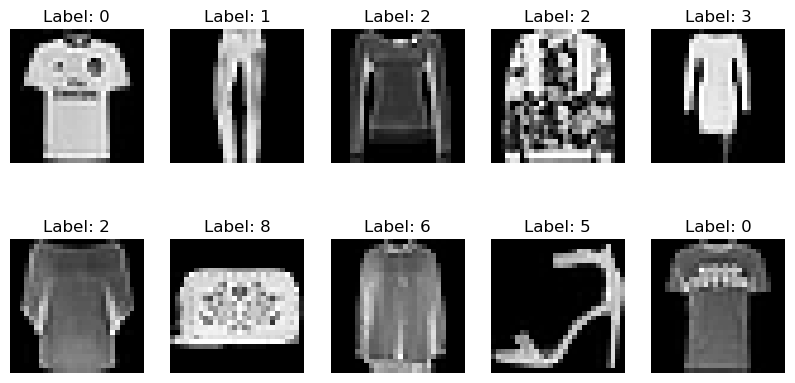

In [74]:
# Visualizing the first 10 test samples

import matplotlib.pyplot as plt

#Extracting 10 samples from the test dataset
X_test_samples = X_test_images.iloc[:10]
Y_test_sample = Y_test_images.iloc[:10]

#Plotting the Visualizations
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_samples.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {Y_test_sample.iloc[i]}")
    plt.axis('off')
plt.show()



**Part(b)**

In [77]:
#Configurations 
layer_sizes = [128, 64, 32]
batch_size = 128
lr = 2e-5
max_iterations = 100
activation_func = ['logistic', 'tanh', 'relu', 'identity']
loss_train_hist = {}
loss_val_hist = {}

In [79]:
# Prepare the training and validation datasets

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X_train_images, test_size=0.2, random_state=42)
Y_train, Y_val = train_test_split(Y_train_images, test_size=0.2, random_state=42)

In [87]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

# Define parameters
activation_func = ['logistic', 'tanh', 'relu', 'identity']
layer_sizes = [128, 64, 32]
batch_size = 128
lr = 2e-5
max_iterations = 100  # Total training iterations

# Dictionaries to store loss history and accuracy for each activation function
loss_train_hist = {}
loss_val_hist = {}
test_accuracies = {}

# Loop through each activation function
for activation in activation_func:
    print(f"\nTraining with activation function: {activation}")
    
    # Initialize the MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, activation=activation, solver='adam',
                        batch_size=batch_size, learning_rate_init=lr, max_iter=1, warm_start=True)
    
    training_loss, validation_loss = [], []
    
    # Training loop
    for epoch in range(max_iterations):
        mlp.fit(X_train, Y_train)  # Train the model for one iteration
        
        # Calculate training loss
        Y_train_pred = mlp.predict_proba(X_train)
        train_loss = log_loss(Y_train, Y_train_pred)
        training_loss.append(train_loss)
        
        # Calculate validation loss
        Y_val_pred = mlp.predict_proba(X_val)
        val_loss = log_loss(Y_val, Y_val_pred)
        validation_loss.append(val_loss)
        
        # Print loss values at intervals
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{max_iterations} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")
    
    # Save the loss history for plotting
    loss_train_hist[activation] = training_loss
    loss_val_hist[activation] = validation_loss
    
    # Evaluate on test set
    test_predictions = mlp.predict(X_test_images)
    test_accuracy = accuracy_score(Y_test_images, test_predictions)
    test_accuracies[activation] = test_accuracy
    print(f"Test Set Accuracy with {activation} activation: {test_accuracy:.4f}")




Training with activation function: logistic
Epoch 10/100 - Training Loss: 2.3090, Validation Loss: 2.3231
Epoch 20/100 - Training Loss: 2.2671, Validation Loss: 2.2752
Epoch 30/100 - Training Loss: 2.2193, Validation Loss: 2.2254
Epoch 40/100 - Training Loss: 2.1571, Validation Loss: 2.1637
Epoch 50/100 - Training Loss: 2.0817, Validation Loss: 2.0891
Epoch 60/100 - Training Loss: 2.0015, Validation Loss: 2.0100
Epoch 70/100 - Training Loss: 1.9267, Validation Loss: 1.9361
Epoch 80/100 - Training Loss: 1.8612, Validation Loss: 1.8706
Epoch 90/100 - Training Loss: 1.8060, Validation Loss: 1.8152
Epoch 100/100 - Training Loss: 1.7583, Validation Loss: 1.7678
Test Set Accuracy with logistic activation: 0.2910

Training with activation function: tanh
Epoch 10/100 - Training Loss: 1.1259, Validation Loss: 1.1296
Epoch 20/100 - Training Loss: 0.8398, Validation Loss: 0.8522
Epoch 30/100 - Training Loss: 0.7000, Validation Loss: 0.7192
Epoch 40/100 - Training Loss: 0.6164, Validation Loss: 0

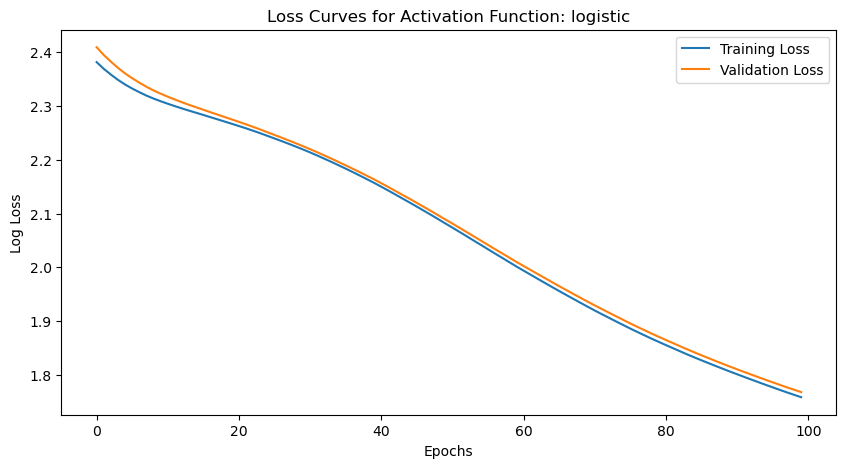

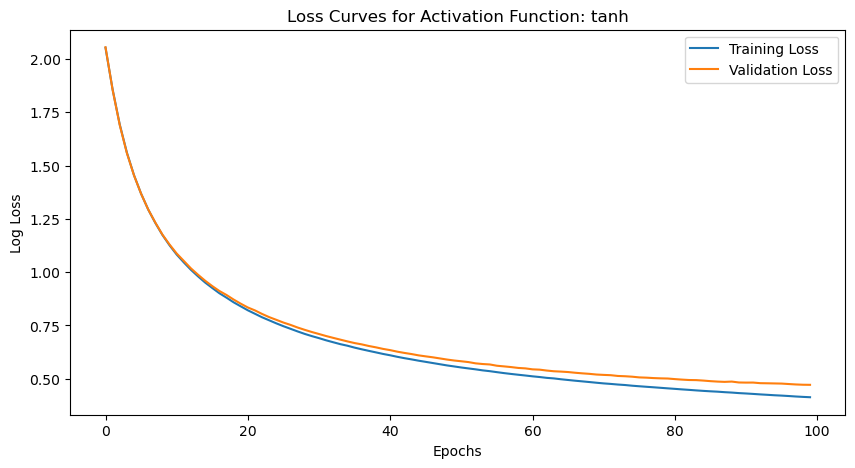

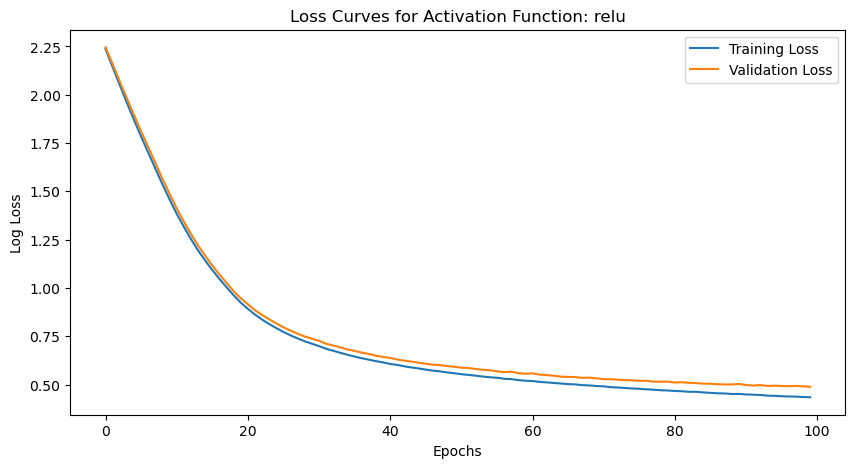

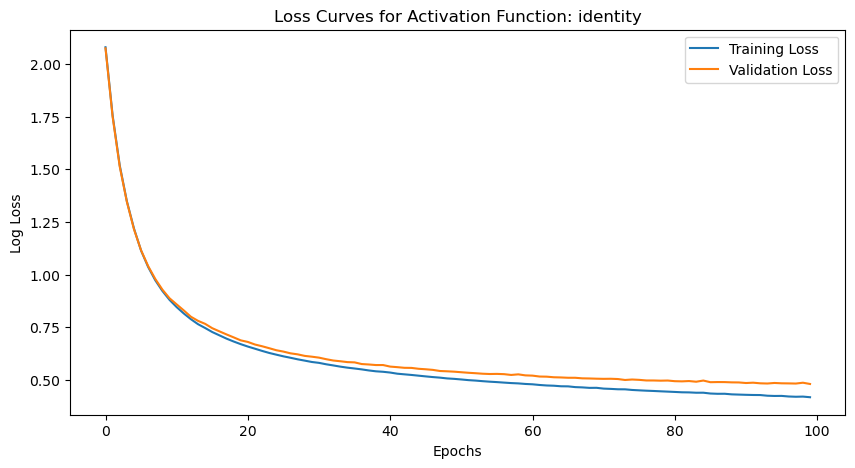


Test Set Accuracies for Each Activation Function:
logistic: 0.2910
tanh: 0.8365
relu: 0.8260
identity: 0.8275

The best activation function based on test set performance is: tanh


In [89]:
# Plotting loss curves
for activation in activation_func:
    plt.figure(figsize=(10, 5))
    plt.plot(loss_train_hist[activation], label='Training Loss')
    plt.plot(loss_val_hist[activation], label='Validation Loss')
    plt.title(f'Loss Curves for Activation Function: {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

# Summary of test set accuracies
print("\nTest Set Accuracies for Each Activation Function:")
for activation, accuracy in test_accuracies.items():
    print(f"{activation}: {accuracy:.4f}")

# Best-performing activation function based on test accuracy
best_activation = max(test_accuracies, key=test_accuracies.get)
print(f"\nThe best activation function based on test set performance is: {best_activation}")

**Part(c)**

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Use the best activation function identified in part 2
best_activation = 'tanh'  # replace with the best activation function from part 2

# Define parameter grid for grid search
param_grid = {
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate_init': [0.0001, 0.0005, 0.001],
    'batch_size': [64, 128, 256],
    'hidden_layer_sizes': [(128, 64, 32)],
    'max_iter': [100]  # fixed number of iterations for each training
}

# Initialize the MLP classifier with the best activation function
mlp = MLPClassifier(activation=best_activation)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Perform grid search on the training data
grid_search.fit(X_train_images, Y_train_images)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=adam; total time= 1.1min
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=adam; total time= 1.2min
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=adam; total time= 1.0min
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=sgd; total time=  51.9s
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=sgd; total time=  48.9s
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=sgd; total time=  50.2s
[CV] END batch_size=64, hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0001, max_iter=100, solver=lbfgs; total time=  12.4s
[CV] END batch_size=64, 

**Part(d)**


Training with activation function: Rectified Linear Unit(ReLU)
Epoch 10/100 - Training Loss: 0.0753, Validation Loss: 0.0757
Epoch 20/100 - Training Loss: 0.0466, Validation Loss: 0.0465
Epoch 30/100 - Training Loss: 0.0375, Validation Loss: 0.0373
Epoch 40/100 - Training Loss: 0.0324, Validation Loss: 0.0323
Epoch 50/100 - Training Loss: 0.0289, Validation Loss: 0.0289
Epoch 60/100 - Training Loss: 0.0268, Validation Loss: 0.0269
Epoch 70/100 - Training Loss: 0.0255, Validation Loss: 0.0255
Epoch 80/100 - Training Loss: 0.0244, Validation Loss: 0.0244
Epoch 90/100 - Training Loss: 0.0235, Validation Loss: 0.0235
Epoch 100/100 - Training Loss: 0.0228, Validation Loss: 0.0228


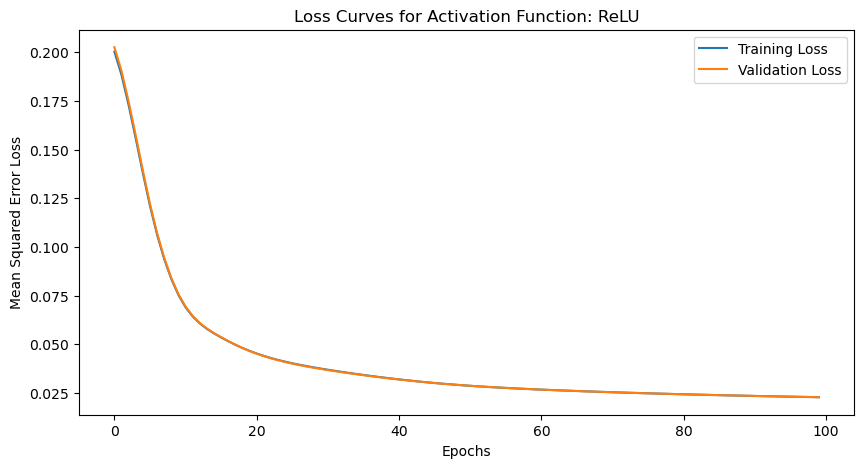

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


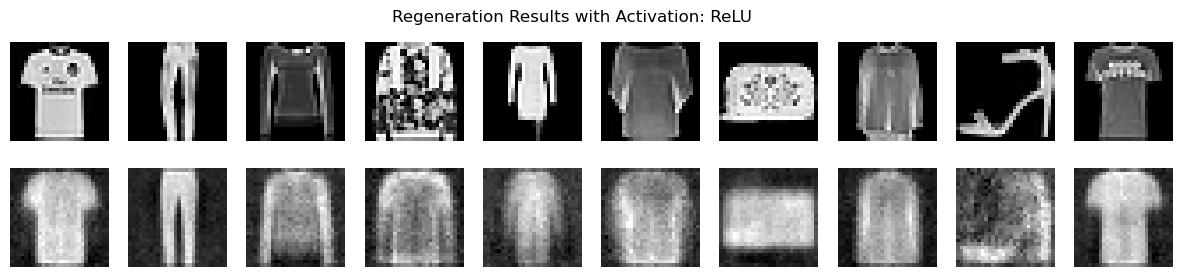

In [91]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Set layer sizes based on given configuration c > b > a
layer_sizes = [256, 128, 64, 128, 256]  # Example: c=256, b=128, a=64
lr = 2e-5
max_epochs = 100

print("\nTraining with activation function: Rectified Linear Unit(ReLU)")
    
# Initialize the MLP regressor
relu_model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='relu', solver='adam',
                   learning_rate_init=lr, max_iter=1, warm_start=True)

training_loss_relu, validation_loss_relu = [], []

# Training loop
for epoch in range(max_epochs):
    # Train on training set
    relu_model.fit(X_train, X_train)  # Target is the input image itself
    
    # Calculate and record training loss
    train_pred = relu_model.predict(X_train)
    train_loss = mean_squared_error(X_train, train_pred)
    training_loss_relu.append(train_loss)
    
    # Calculate and record validation loss
    val_pred = relu_model.predict(X_val)
    val_loss = mean_squared_error(X_val, val_pred)
    validation_loss_relu.append(val_loss)

    # Print loss values at intervals
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{max_epochs} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(training_loss_relu, label='Training Loss')
plt.plot(validation_loss_relu, label='Validation Loss')
plt.title('Loss Curves for Activation Function: ReLU')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

regenerated_samples = relu_model.predict(X_test_samples.values)  # Assuming mlp.predict expects a NumPy array

# Plot original and regenerated images for comparison
plt.figure(figsize=(15, 3))
for i in range(min(10, len(X_test_samples))):
    # Original images
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_samples.iloc[i].values.reshape(28, 28), cmap='gray')  # Use .iloc[i] here
    plt.axis('off')

    # Regenerated images
    plt.subplot(2, 10, i + 11)
    plt.imshow(regenerated_samples[i].reshape(28, 28), cmap='gray')  # Assuming regenerated_samples is appropriate
    plt.axis('off')

plt.suptitle('Regeneration Results with Activation: ReLU')
plt.show()




Training with activation function: Identity
Epoch 10/100 - Training Loss: 0.0582, Validation Loss: 0.0583
Epoch 20/100 - Training Loss: 0.0381, Validation Loss: 0.0381
Epoch 30/100 - Training Loss: 0.0299, Validation Loss: 0.0299
Epoch 40/100 - Training Loss: 0.0259, Validation Loss: 0.0259
Epoch 50/100 - Training Loss: 0.0236, Validation Loss: 0.0236
Epoch 60/100 - Training Loss: 0.0219, Validation Loss: 0.0220
Epoch 70/100 - Training Loss: 0.0206, Validation Loss: 0.0207
Epoch 80/100 - Training Loss: 0.0195, Validation Loss: 0.0195
Epoch 90/100 - Training Loss: 0.0185, Validation Loss: 0.0186
Epoch 100/100 - Training Loss: 0.0177, Validation Loss: 0.0177


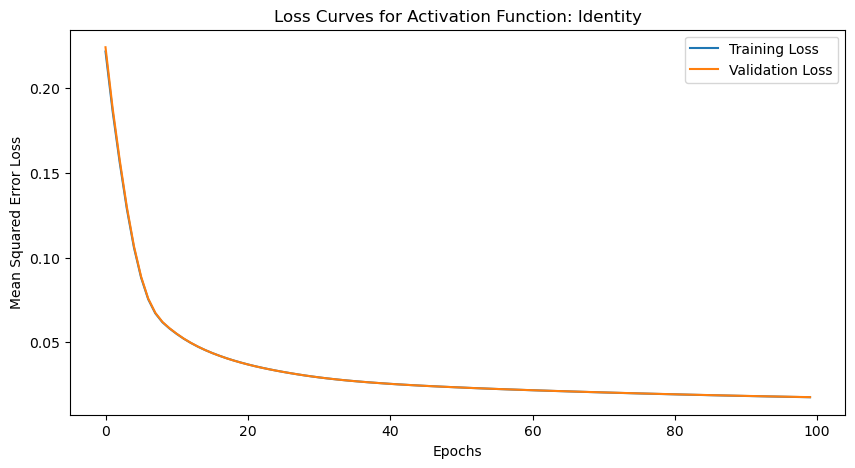

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


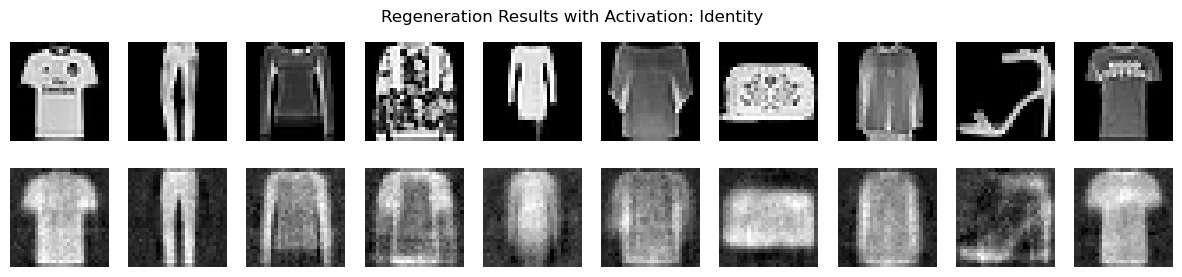

In [93]:
print("\nTraining with activation function: Identity")
    
# Initialize the MLP regressor
identity_model = MLPRegressor(hidden_layer_sizes=layer_sizes, activation='identity', solver='adam',
                   learning_rate_init=lr, max_iter=1, warm_start=True)

training_loss_identity, validation_loss_identity = [], []

for epoch in range(max_epochs):
    identity_model.fit(X_train, X_train)  
    
    train_pred = identity_model.predict(X_train)
    train_loss = mean_squared_error(X_train, train_pred)
    training_loss_identity.append(train_loss)
    val_pred = identity_model.predict(X_val)
    val_loss = mean_squared_error(X_val, val_pred)
    validation_loss_identity.append(val_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{max_epochs} - Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(training_loss_identity, label='Training Loss')
plt.plot(validation_loss_identity, label='Validation Loss')
plt.title('Loss Curves for Activation Function: Identity')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

regenerated_samples = identity_model.predict(X_test_samples.values) 

plt.figure(figsize=(15, 3))
for i in range(min(10, len(X_test_samples))):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_samples.iloc[i].values.reshape(28, 28), cmap='gray') 
    plt.axis('off')

    # Regenerated images
    plt.subplot(2, 10, i + 11)
    plt.imshow(regenerated_samples[i].reshape(28, 28), cmap='gray') 
    plt.axis('off')

plt.suptitle('Regeneration Results with Activation: Identity')
plt.show()

**Part(e)**

In [95]:
import numpy as np
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming `relu_model` and `identity_model` are trained MLPRegressor networks
# with layer sizes [c, b, a, b, c] on the regeneration task.

def extract_features(model, X_data, layer_index=2):
    """
    Extracts features from the specified hidden layer of a trained MLP model.
    
    Parameters:
    - model: Trained MLPRegressor model
    - X_data: Input data (either training or testing set)
    - layer_index: Index of the layer to extract features from (2 for third layer 'a' in this case)
    
    Returns:
    - features: Numpy array of extracted features
    """
    # Forward pass through each layer until the specified layer is reached
    activations = X_data
    for i in range(layer_index + 1):  # Iterate through layers up to and including `layer_index`
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        
        # Apply activation function if it's not the output layer
        if model.activation == 'relu' and i < layer_index:
            activations = np.maximum(0, activations)  # ReLU
        elif model.activation == 'identity' and i < layer_index:
            pass  # Identity activation does nothing
            
    return activations

# Extract features for the train and test datasets using both models
train_features_relu = extract_features(relu_model, X_train_images)
test_features_relu = extract_features(relu_model, X_test_images)

train_features_identity = extract_features(identity_model, X_train_images)
test_features_identity = extract_features(identity_model, X_test_images)

# Verify shapes
print("Train features shape (ReLU):", train_features_relu.shape)
print("Test features shape (ReLU):", test_features_relu.shape)
print("Train features shape (Identity):", train_features_identity.shape)
print("Test features shape (Identity):", test_features_identity.shape)

Train features shape (ReLU): (8000, 64)
Test features shape (ReLU): (2000, 64)
Train features shape (Identity): (8000, 64)
Test features shape (Identity): (2000, 64)


In [97]:
# Parameters for the new MLP classifier
a_size = train_features_relu.shape[1]  # Feature size 'a' from the third layer
new_classifier_params = {
    'hidden_layer_sizes': (a_size, a_size),
    'solver': 'adam',
    'learning_rate_init': 2e-5,
    'max_iter': 200,
}

# Train the new classifiers on the extracted features from both models
clf_relu = MLPClassifier(**new_classifier_params)
clf_identity = MLPClassifier(**new_classifier_params)

clf_relu.fit(train_features_relu, Y_train_images)
clf_identity.fit(train_features_identity, Y_train_images)

# Test the classifiers
y_pred_relu = clf_relu.predict(test_features_relu)
y_pred_identity = clf_identity.predict(test_features_identity)

# Calculate and print accuracies
accuracy_relu = accuracy_score(Y_test_images, y_pred_relu)
accuracy_identity = accuracy_score(Y_test_images, y_pred_identity)

print(f"Test accuracy with ReLU features: {accuracy_relu:.4f}")
print(f"Test accuracy with Identity features: {accuracy_identity:.4f}")

Test accuracy with ReLU features: 0.7480
Test accuracy with Identity features: 0.8035
